In [11]:
import pandas as pd

# Load the CSV file into a DataFrame
data= pd.read_csv('ES_Vietnam_2005_2009_2015.csv',encoding='latin1')

# Display the first few rows of the DataFrame
data

C:\Users\ThinkBook\AppData\Local\Temp\ipykernel_8428\89181210.py:4: DtypeWarning: Columns (8,44,59,85,87,113,149,292,301,329,332,335,388,396,409,440,457,462,465,469,472,512,527,532,630,644,657,661,663,738) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv('ES_Vietnam_2005_2009_2015.csv',encoding='latin1')


idstd2015   id2015  idstd2009  id2009  idstd2005   id2005  year  panel  \
0      599613.0      NaN   466100.0     4.0    60775.0  10597.0  2005      6   
1      599613.0      NaN   466100.0     4.0    60775.0      NaN  2009      6   
2      599613.0  10697.0        NaN     NaN        NaN      NaN  2015      6   
3      599614.0      NaN   466101.0     6.0    60785.0  10619.0  2005      6   
4      599614.0      NaN   466101.0     6.0    60785.0      NaN  2009      6   
...         ...      ...        ...     ...        ...      ...   ...    ...   
3194        NaN      NaN        NaN     NaN    60687.0   9467.0  2005      1   
3195        NaN      NaN        NaN     NaN    60619.0   8246.0  2005      1   
3196        NaN      NaN        NaN     NaN    61059.0   2764.0  2005      1   
3197        NaN      NaN        NaN     NaN    60332.0   3285.0  2005      1   
3198        NaN      NaN        NaN     NaN    60185.0    930.0  2005      1   

                                        eligibility2015  _2015_preference  \
0     1. Eligible establishment (Correct name and ad...               NaN   
1     1. Eligible establishment (Correct name and ad...               NaN   
2                                                   NaN               6.0   
3     1. Eligible establishment (Correct name and ad...               NaN   
4     1. Eligible establishment (Correct name and ad...               NaN   
...                                                 ...               ...   
3194                                                NaN               NaN   
3195                                                NaN               NaN   
3196                                                NaN               NaN   
3197                                                NaN               NaN   
3198                                                NaN               NaN   

      _2015_rotation   a0  a1  _2015_a1a  _2015_a2  _2015_a3a  _2015_a3a2  \
0                NaN  NaN  99        NaN       NaN        NaN         NaN   
1                NaN  1.0  99        NaN       NaN        NaN         NaN   
2                NaN  1.0  99        7.0       1.0        1.0         7.0   
3                NaN  NaN  99        NaN       NaN        NaN         NaN   
4                NaN  1.0  99        NaN       NaN        NaN         NaN   
...              ...  ...  ..        ...       ...        ...         ...   
3194             NaN  NaN  99        NaN       NaN        NaN         NaN   
3195             NaN  NaN  99        NaN       NaN        NaN         NaN   
3196             NaN  NaN  99        NaN       NaN        NaN         NaN   
3197             NaN  NaN  99        NaN       NaN        NaN         NaN   
3198             NaN  NaN  99        NaN       NaN        NaN         NaN   

      _2015_a3b  _2015_a3c  _2015_a3  _2015_a4a  _2015_a4b   a5  a6a  a6b  \
0           NaN        NaN       NaN        NaN        NaN  NaN  NaN  NaN   
1           NaN        NaN       NaN        NaN        NaN  1.0  3.0  3.0   
2           1.0        2.0       5.0       15.0       15.0  1.0  3.0  3.0   
3           NaN        NaN       NaN        NaN        NaN  NaN  NaN  NaN   
4           NaN        NaN       NaN        NaN        NaN  1.0  3.0  3.0   
...         ...        ...       ...        ...        ...  ...  ...  ...   
3194        NaN        NaN       NaN        NaN        NaN  NaN  NaN  NaN   
3195        NaN        NaN       NaN        NaN        NaN  NaN  NaN  NaN   
3196        NaN        NaN       NaN        NaN        NaN  NaN  NaN  NaN   
3197        NaN        NaN       NaN        NaN        NaN  NaN  NaN  NaN   
3198        NaN        NaN       NaN        NaN        NaN  NaN  NaN  NaN   

       a7  a7a  a8a   a9  a10  a11  _2015_a11a    a12    a13  a14d  a14m  \
0     NaN  2.0  NaN  NaN  NaN  NaN         NaN    NaN    NaN   NaN   NaN   
1     1.0  2.0  2.0 -7.0 -7.0  2.0         NaN  106.0  200.0  28.0   7.0   
2     1.0  4.0  1.0  NaN  NaN  1.0        

In [12]:
df = data.copy()
df['a6a'].dtypes

dtype('float64')

In [13]:
df['a6a'].value_counts(dropna=False)
# Drop rows where 'a6a' has NaN or 0 values
df = df.dropna(subset=['a6a'])  # Drop NaN values in 'a6a'
df = df[df['a6a'] != 0]  # Drop rows where 'a6a' is 0

# Compute the median of the 'a6a' column
# Convert 'a6a' to numeric (in case there are non-numeric values)
df["l1"] = pd.to_numeric(df["l1"], errors="coerce")

# Compute the median of the 'a6a' column
median_l1 = df["l1"].median()

# Print the median value
print("Median of l1:", median_l1)
print(len(df))

Median of l1: 37.0
2042


In [14]:
# Function to classify enterprises based on a6a and l1
def categorize_enterprise(row, median_l1):
    a6a_value = row["a6a"]
    l1_value = row["l1"]
    
    if a6a_value in [2, 3] and l1_value > median_l1:
        return 2  # Large Enterprise
    else:
        return 1  # Small Enterprise

# Apply the function to create enterprise_category
df["enterprise_category"] = df.apply(lambda row: categorize_enterprise(row, median_l1), axis=1)

# Check counts
print(df['enterprise_category'].value_counts())


enterprise_category
1    1106
2     936
Name: count, dtype: int64


In [15]:
# Filter the data for large firms (enterprise_category == 2)
df_large = df[df["enterprise_category"] == 2]

# Filter the data for small firms (enterprise_category == 1)
df_small = df[df["enterprise_category"] == 1]

# Print the number of firms in each category
print("Number of large firms:", len(df_large))
print("Number of small firms:", len(df_small))


Number of large firms: 936
Number of small firms: 1106


In [16]:
import pandas as pd

# Filter for large firms only
df_large = df[df["enterprise_category"] == 2]
# 'id2015': Firm's unique identifier in 2015
# 'idstd2009': ID for the firm in 2009
# 'id2009': Firm's unique identifier in 2009
# 'idstd2005': ID for the firm in 2005
# 'id2005': Firm's unique identifier in 2005
# 'a6a': Company size classification (Small, Medium, Large)
col_id = ['idstd2015', 'id2015', 'idstd2009', 'id2009', 'idstd2005', 'id2005', 'a6a'] 

# ************************************************ YEAR 2015 ************************************************

# Select the variable cost of 2015
# 'c9b': Annual losses due to power outages
# 'd1a3': % of sales (d2) represented by main activity or product
# 'd2': Total annual sales for all products and services (VND)
# 'd10': Losses due to theft as % of the value of the products
# 'd11': Losses due to breakage or spoilage as % of the value of the products
# '_2015_h8': Cost of formal research and development activities
# 'i2b': Total annual cost of security
# 'i4b': Total annual value of losses due to theft, robbery, vandalism
# 'n2a': Total annual cost of labor
# 'n2b': Total annual cost of electricity
# 'n2i': Total annual cost of sales (for retails)
# 'n2e': Total annual cost of raw materials and intermediate goods used in production
# 'n2f': Total annual cost of fuel
col_15A = ['c9b', 'd1a3', 'd2', 'd10', 'd11', '_2015_h8', 'i2b', 'i4b','n2a', 'n2b', 'n2i', 'n2e', 'n2f']

# Select production input of 2015 (Labor, Capital, Investment)
# 'l1': Permanent, full-time workers at the end of last fiscal year
# 'n5a': Purchase of new or used machinery, vehicles, and equipment
# 'n5b': Lands & buildings
# '_2015_h8': Cost of formal research and development activities (innovation activities)
col_15B = ['n5a', 'n5b', '_2015_h8', 'l1']

# Select financing variables of 2015 
# 'k1c': % Purchased on credit (loans)
# 'k2c': % Sold on credit (receivables)
col_15C = ['k1c', 'k2c']

# ************************************************ YEAR 2005 ************************************************

# Select the variable cost of 2005 (Section II: Productivity)
# '_2005_q86a1': Total sales
# '_2005_q86a3': Total purchases of raw materials and intermediate goods
# '_2005_q86a4': Total cost of labor
# '_2005_q86a5': Depreciation
# '_2005_q86a6': Rent on land and buildings
# '_2005_q86a8': Rent on machinery, equipment, and vehicles
# '_2005_q86a9': Interest charges
# '_2005_q86a10': Energy cost
# '_2005_q86a11': Taxes
col_05A = ['_2005_q86a1', '_2005_q86a3', '_2005_q86a4', '_2005_q86a5', '_2005_q86a6', '_2005_q86a8', '_2005_q86a9', '_2005_q86a10', '_2005_q86a11']

# Select production input of 2005
# 'q91a1': Total fixed assets
# 'q91a7': Total current assets (need to exclude receivables (q91a12))
# 'q91a12': Receivables
# '_2005_q87a': Net profits (after tax) in 2004
# '_2005_q87d': % of the establishment’s net profits (after tax) reinvested in the establishment
col_05B = ['q91a1', 'q91a7', 'q91a12', '_2005_q87a', '_2005_q87d']

# Select financing variables of 2005 (SECTION III. PRODUCTIVITY)
# 'q91a12': Receivables
col_05C = ['q91a12']

# Combine all columns, removing duplicates
all_cols = list(set(col_id + col_15A + col_15B + col_15C + col_05A + col_05B + col_05C))

# Select only the specified columns (if they exist in df_large)
df_large = df_large[[col for col in all_cols if col in df_large.columns]]

# =============================== DATA CLEANING & TRANSFORMATION ===============================

# Convert entire DataFrame to numeric (non-convertible values become NaN)
df_large = df_large.apply(pd.to_numeric, errors='coerce')

# Convert specific columns to numeric and fill missing values with 0
numeric_cols = ['d2', 'd1a3', 'd10', 'd11', 'n5a', 'n5b', '_2015_h8', 'k1c']
for col in numeric_cols:
    if col in df_large.columns:
        df_large[col] = pd.to_numeric(df_large[col], errors='coerce').fillna(0)
    else:
        print(f"Warning: Column {col} not found in DataFrame. Filling with 0.")
        df_large[col] = 0

# =============================== FEATURE ENGINEERING ===============================

# Check if required columns exist for feature engineering
required_cols = ['d2', 'd1a3', 'd10', 'd11', 'n5a', 'n5b', '_2015_h8', 'k1c']
missing_cols = [col for col in required_cols if col not in df_large.columns]
if missing_cols:
    print(f"Warning: Missing columns for feature engineering: {missing_cols}")

# 'main_activity_sales': Total sales derived from the main activity or product
df_large['main_activity_sales'] = (df_large['d2'] / 100 * df_large['d1a3'])

# 'total_purchases_2015': Total capital investment in 2015
df_large['total_purchases_2015'] = df_large['n5a'] + df_large['n5b'] + df_large['_2015_h8']

# 'purchased_on_credit': Investment amount made via credit financing
df_large['purchased_on_credit'] = df_large['total_purchases_2015'] * (df_large['k1c'] / 100)

# =============================== OUTPUT ===============================
# Set display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Show processed data for large firms (first 5 rows, all columns)
print(df_large.head().to_string())

   _2005_q86a5  idstd2015           n2a     l1  d10  idstd2005           n2e  _2005_q86a6           i2b           n5a  n2i  c9b    k1c           n2f  _2005_q86a1  a6a  _2005_q87d           n2b  i4b   d1a3  _2005_q86a10  id2005  idstd2009  id2009            d2  _2005_q86a3    k2c  _2005_q86a8  _2005_q86a11  n5b  d11  _2005_q86a4  _2005_q87a      _2015_h8  _2005_q86a9   id2015  main_activity_sales  total_purchases_2015  purchased_on_credit
1          NaN   599613.0  2.900000e+09  323.0  0.0    60775.0  1.800000e+10          NaN  5.400000e+07  2.000000e+08  NaN  NaN  100.0  6.000000e+07          NaN  3.0         NaN  2.800000e+08  NaN  100.0           NaN     NaN   466100.0     4.0  2.750000e+10          NaN  100.0          NaN           NaN  0.0  0.0          NaN         NaN  0.000000e+00          NaN      NaN         2.750000e+10          2.000000e+08         2.000000e+08
2          NaN   599613.0  6.800000e+09  180.0  1.0        NaN  5.860000e+11          NaN           NaN  0.000000e+0

In [17]:
print(len(df_large))
print(len(df_small))

936
1106


In [18]:
import pandas as pd

# Define all the columns you want to keep
columns_to_keep = (
    col_id + col_15A + col_15B + col_15C +
    ['main_activity_sales', 'total_purchases_2015', 'purchased_on_credit', 'enterprise_category']
)

# Keep only columns that exist in the dataframe
available_columns = [col for col in columns_to_keep if col in df_large.columns]

# Keep only rows where both 'id2015' and 'idstd2015' are not missing
df_large_2015_only = df_large[df_large['id2015'].notna() & df_large['idstd2015'].notna()]

# Filter the dataframe with the selected columns
df_large_export_2015 = df_large_2015_only[available_columns]

# Export to CSV
df_large_export_2015.to_csv("cleaned_large_firms_2015_only.csv", index=False)


In [19]:

# Ensure engineered columns exist
df_large_2015_only['total_purchases_2015'] = (
    df_large_2015_only['n5a'] + df_large_2015_only['n5b'] + df_large_2015_only['_2015_h8']
)
if 'purchased_on_credit' not in df_large_2015_only.columns:
    df_large_2015_only['purchased_on_credit'] = (
        df_large_2015_only['total_purchases_2015'] * (df_large_2015_only['k1c'] / 100)
    )

# Convert to numeric
df_large_2015_only['purchased_on_credit'] = pd.to_numeric(
    df_large_2015_only['purchased_on_credit'], errors='coerce'
)
df_large_2015_only[['l1', 'n5a', 'n5b', '_2015_h8']] = df_large_2015_only[
    ['l1', 'n5a', 'n5b', '_2015_h8']
].apply(pd.to_numeric, errors='coerce')

# Define dependent variable (Y): debt
Y = df_large_2015_only['purchased_on_credit']

# Define independent variables (X): production inputs
X = df_large_2015_only[['l1', 'n5a', 'n5b', '_2015_h8']]

# Add constant
X = sm.add_constant(X)

# Drop rows with missing values
valid_idx = X.dropna().index.intersection(Y.dropna().index)
X = X.loc[valid_idx]
Y = Y.loc[valid_idx]

# Print shapes
print(X.shape)
print(Y.shape)

# Run regression
model = sm.OLS(Y, X).fit()

# Print results
print(model.summary())

# Optional: Correlation matrix
print(df_large_2015_only[['purchased_on_credit', 'l1', 'n5a', 'n5b', '_2015_h8']].corr())

C:\Users\ThinkBook\AppData\Local\Temp\ipykernel_8428\3000839243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_large_2015_only['total_purchases_2015'] = (
C:\Users\ThinkBook\AppData\Local\Temp\ipykernel_8428\3000839243.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_large_2015_only['purchased_on_credit'] = pd.to_numeric(
C:\Users\ThinkBook\AppData\Local\Temp\ipykernel_8428\3000839243.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

NameError: name 'sm' is not defined

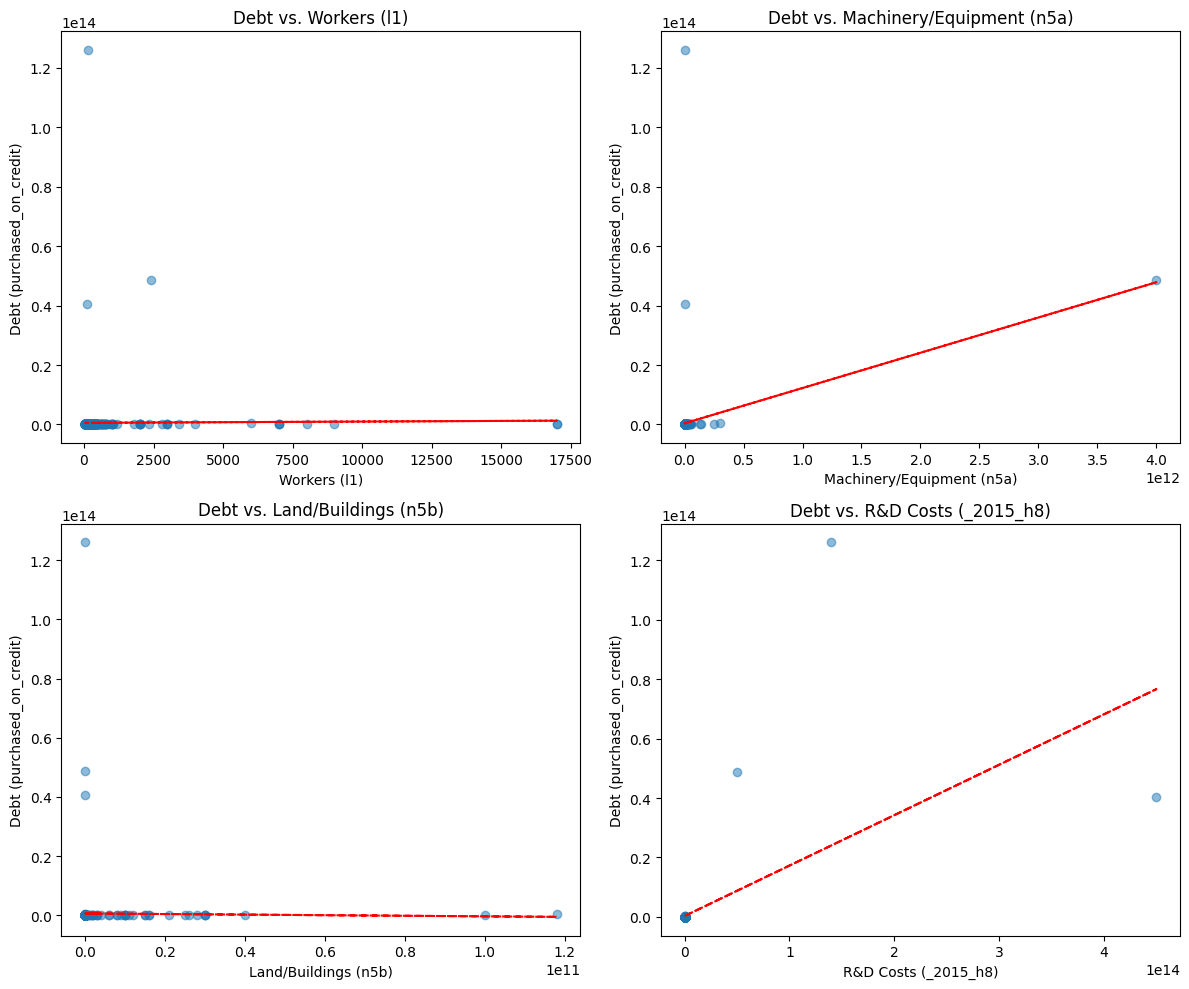

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plots with regression lines using matplotlib
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten for easier iteration
input_vars = ['l1', 'n5a', 'n5b', '_2015_h8']
labels = ['Workers (l1)', 'Machinery/Equipment (n5a)', 'Land/Buildings (n5b)', 'R&D Costs (_2015_h8)']

for i, var in enumerate(input_vars):
    # Scatter plot
    axes[i].scatter(df_large_2015_only[var], df_large_2015_only['purchased_on_credit'], alpha=0.5)
    
    # Fit regression line
    valid_data = df_large_2015_only[[var, 'purchased_on_credit']].dropna()
    if not valid_data.empty:
        z = np.polyfit(valid_data[var], valid_data['purchased_on_credit'], 1)
        p = np.poly1d(z)
        axes[i].plot(valid_data[var], p(valid_data[var]), color='red', linestyle='--')
    
    axes[i].set_xlabel(labels[i])
    axes[i].set_ylabel('Debt (purchased_on_credit)')
    axes[i].set_title(f'Debt vs. {labels[i]}')

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = sm.add_constant(X) 
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)


   Variable       VIF
0     const  0.000000
1        l1  1.009579
2       n5a  1.019876
3       n5b  1.000816
4  _2015_h8  1.010746


c:\Users\ThinkBook\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [ ]:
df_small = df[df["enterprise_category"] == 1]

# =============================== COLUMN DEFINITIONS ===============================

# 'id2015': Firm's unique identifier in 2015
# 'idstd2009': ID for the firm in 2009
# 'id2009': Firm's unique identifier in 2009
# 'idstd2005': ID for the firm in 2005
# 'id2005': Firm's unique identifier in 2005
# 'a6a': Company size classification (Small, Medium, Large)
col_id = ['idstd2015', 'id2015', 'idstd2009', 'id2009', 'idstd2005', 'id2005', 'a6a'] 

# ************************************************ YEAR 2015 ************************************************

# Select the variable cost of 2015
# 'c9b': Annual losses due to power outages
# 'd1a3': % of sales (d2) represented by main activity or product
# 'd2': Total annual sales for all products and services (VND)
# 'd10': Losses due to theft as % of the value of the products
# 'd11': Losses due to breakage or spoilage as % of the value of the products
# '_2015_h8': Cost of formal research and development activities
# 'i2b': Total annual cost of security
# 'i4b': Total annual value of losses due to theft, robbery, vandalism
# 'n2a': Total annual cost of labor
# 'n2b': Total annual cost of electricity
# 'n2i': Total annual cost of sales (for retails)
# 'n2e': Total annual cost of raw materials and intermediate goods used in production
# 'n2f': Total annual cost of fuel
col_15A = ['c9b', 'd1a3', 'd2', 'd10', 'd11', '_2015_h8', 'i2b', 'i4b','n2a', 'n2b', 'n2i', 'n2e', 'n2f']

# Select production input of 2015 (Labor, Capital, Investment)
# 'l1': Permanent, full-time workers at the end of last fiscal year
# 'n5a': Purchase of new or used machinery, vehicles, and equipment
# 'n5b': Lands & buildings
# '_2015_h8': Cost of formal research and development activities (innovation activities)
col_15B = ['n5a', 'n5b', '_2015_h8', 'l1']

# Select financing variables of 2015 
# 'k1c': % Purchased on credit (loans)
# 'k2c': % Sold on credit (receivables)
col_15C = ['k1c', 'k2c']

# ************************************************ YEAR 2005 ************************************************

# Select the variable cost of 2005 (Section II: Productivity)
# '_2005_q86a1': Total sales
# '_2005_q86a3': Total purchases of raw materials and intermediate goods
# '_2005_q86a4': Total cost of labor
# '_2005_q86a5': Depreciation
# '_2005_q86a6': Rent on land and buildings
# '_2005_q86a8': Rent on machinery, equipment, and vehicles
# '_2005_q86a9': Interest charges
# '_2005_q86a10': Energy cost
# '_2005_q86a11': Taxes
col_05A = ['_2005_q86a1', '_2005_q86a3', '_2005_q86a4', '_2005_q86a5', '_2005_q86a6', '_2005_q86a8', '_2005_q86a9', '_2005_q86a10', '_2005_q86a11']

# Select production input of 2005
# 'q91a1': Total fixed assets
# 'q91a7': Total current assets (need to exclude receivables (q91a12))
# 'q91a12': Receivables
# '_2005_q87a': Net profits (after tax) in 2004
# '_2005_q87d': % of the establishment’s net profits (after tax) reinvested in the establishment
col_05B = ['q91a1', 'q91a7', 'q91a12', '_2005_q87a', '_2005_q87d']

# Select financing variables of 2005 (SECTION III. PRODUCTIVITY)
# 'q91a12': Receivables
col_05C = ['q91a12']

# Combine all columns, removing duplicates
all_cols = list(set(col_id + col_15A + col_15B + col_15C + col_05A + col_05B + col_05C))

# Select only the specified columns (if they exist in df_small)
df_small = df_small[[col for col in all_cols if col in df_small.columns]]

# =============================== DATA CLEANING & TRANSFORMATION ===============================

# Convert entire DataFrame to numeric (non-convertible values become NaN)
df_small = df_small.apply(pd.to_numeric, errors='coerce')

# Convert specific columns to numeric and fill missing values with 0
numeric_cols = ['d2', 'd1a3', 'd10', 'd11', 'n5a', 'n5b', '_2015_h8', 'k1c']
for col in numeric_cols:
    if col in df_small.columns:
        df_small[col] = pd.to_numeric(df_small[col], errors='coerce').fillna(0)
    else:
        print(f"Warning: Column {col} not found in DataFrame. Filling with 0.")
        df_small[col] = 0

# =============================== FEATURE ENGINEERING ===============================

# Check if required columns exist for feature engineering
required_cols = ['d2', 'd1a3', 'd10', 'd11', 'n5a', 'n5b', '_2015_h8', 'k1c']
missing_cols = [col for col in required_cols if col not in df_small.columns]
if missing_cols:
    print(f"Warning: Missing columns for feature engineering: {missing_cols}")

# 'main_activity_sales': Total sales derived from the main activity or product
df_small['main_activity_sales'] = (df_small['d2'] / 100 * df_small['d1a3'])

# 'total_purchases_2015': Total capital investment in 2015
df_small['total_purchases_2015'] = df_small['n5a'] + df_small['n5b'] + df_small['_2015_h8']

# 'purchased_on_credit': Investment amount made via credit financing
df_small['purchased_on_credit'] = df_small['total_purchases_2015'] * (df_small['k1c'] / 100)

# =============================== OUTPUT ===============================

# Set display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Show processed data for small firms (first 5 rows, all columns)
print(df_small.head().to_string())


              d2         i2b  a6a           n2a  idstd2015          n5a  _2005_q86a1  _2005_q86a10  n5b  _2005_q86a6  _2005_q86a9  _2005_q86a5  _2005_q86a8  _2005_q87a  c9b           n2f  d10          n2b   k2c           n2e  _2005_q86a11    k1c  idstd2005  d11    l1  _2005_q86a3   id2015        i4b  _2005_q87d   d1a3  n2i  id2005  _2005_q86a4     _2015_h8  idstd2009  id2009  main_activity_sales  total_purchases_2015  purchased_on_credit
16  2.000000e+09  24000000.0  2.0  3.600000e+07   599618.0   32000000.0          NaN           NaN  0.0          NaN          NaN          NaN          NaN         NaN  NaN           NaN  0.0          NaN  50.0           NaN           NaN  100.0    60436.0  0.0  19.0          NaN      NaN  8000000.0         NaN  100.0  NaN     NaN          NaN          0.0   466112.0    32.0         2.000000e+09            32000000.0           32000000.0
17 -9.000000e+00         NaN  1.0 -9.000000e+00   599618.0  100000000.0          NaN           NaN -9.0          NaN

In [ ]:
import pandas as pd

# Define all the columns you want to keep
columns_to_keep = (
    col_id + col_15A + col_15B + col_15C +
    ['main_activity_sales', 'theft_loss_value', 'spoilage_loss_value', 'total_purchases_2015', 'purchased_on_credit', 'enterprise_category']
)

# Keep only columns that exist in the dataframe
available_columns = [col for col in columns_to_keep if col in df_small.columns]

# Keep only rows where both 'id2015' and 'idstd2015' are not missing
df_small_2015_only = df_small[df_small['id2015'].notna() & df_small['idstd2015'].notna()]

# Filter the dataframe with the selected columns
df_small_export_2015 = df_small_2015_only[available_columns]

# Export to CSV
df_small_export_2015.to_csv("cleaned_small_firms_2015_only.csv", index=False)


C:\Users\ThinkBook\AppData\Local\Temp\ipykernel_13044\3903783648.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small_2015_only['purchased_on_credit'] = pd.to_numeric(
C:\Users\ThinkBook\AppData\Local\Temp\ipykernel_13044\3903783648.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small_2015_only['debt'] = df_small_2015_only['purchased_on_credit']


                             OLS Regression Results                            
Dep. Variable:     main_activity_sales   R-squared:                       0.095
Model:                             OLS   Adj. R-squared:                  0.089
Method:                  Least Squares   F-statistic:                     15.64
Date:                 Thu, 15 May 2025   Prob (F-statistic):           3.55e-12
Time:                         21:23:37   Log-Likelihood:                -15633.
No. Observations:                  600   AIC:                         3.128e+04
Df Residuals:                      595   BIC:                         3.130e+04
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.867e+10   2.18e+09      8.55

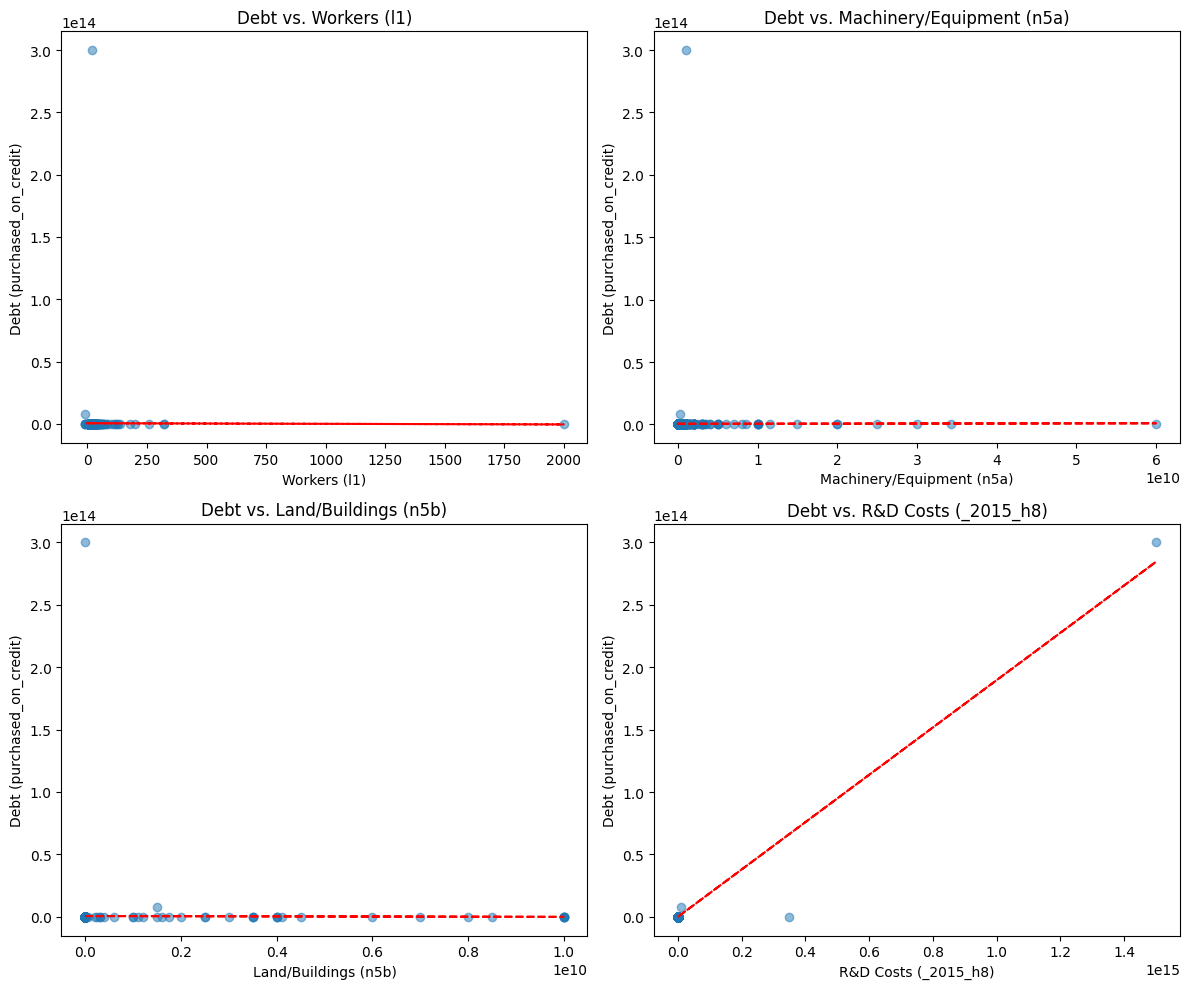

In [ ]:
# Create 'purchased_on_credit' if it doesn't already exist
if 'purchased_on_credit' not in df_small_2015_only.columns:
    df_small_2015_only['purchased_on_credit'] = (
        df_small_2015_only['total_purchases_2015'] * (df_small_2015_only['k1c'] / 100)
    )

# Convert to numeric
df_small_2015_only['purchased_on_credit'] = pd.to_numeric(
    df_small_2015_only['purchased_on_credit'], errors='coerce'
)

# Define 'debt' as independent variable
df_small_2015_only['debt'] = df_small_2015_only['purchased_on_credit']

# Define independent variables (including 'debt')
X = df_small_2015_only[['l1', 'n5a', 'n5b', '_2015_h8']]
X = X.apply(pd.to_numeric, errors='coerce')

# Define dependent variable
Y = pd.to_numeric(df_small_2015_only['main_activity_sales'], errors='coerce')

# Add constant
X = sm.add_constant(X)

# Drop rows with missing values in X or Y
valid_idx = X.dropna().index.intersection(Y.dropna().index)
X = X.loc[valid_idx]
Y = Y.loc[valid_idx]

# Run regression
model = sm.OLS(Y, X).fit()

# Print results
print(model.summary())

# Scatter plots with regression lines for production inputs vs. debt
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten for easier iteration
input_vars = ['l1', 'n5a', 'n5b', '_2015_h8']
labels = ['Workers (l1)', 'Machinery/Equipment (n5a)', 'Land/Buildings (n5b)', 'R&D Costs (_2015_h8)']

for i, var in enumerate(input_vars):
    # Scatter plot
    axes[i].scatter(df_small_2015_only[var], df_small_2015_only['purchased_on_credit'], alpha=0.5)
    
    # Fit regression line
    valid_data = df_small_2015_only[[var, 'purchased_on_credit']].dropna()
    if not valid_data.empty:
        z = np.polyfit(valid_data[var], valid_data['purchased_on_credit'], 1)
        p = np.poly1d(z)
        axes[i].plot(valid_data[var], p(valid_data[var]), color='red', linestyle='--')
    
    axes[i].set_xlabel(labels[i])
    axes[i].set_ylabel('Debt (purchased_on_credit)')
    axes[i].set_title(f'Debt vs. {labels[i]}')

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add constant to X (if not already added)
X_with_const = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Variable'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Display the VIF
print(vif_data)


   Variable       VIF
0     const  0.000000
1        l1  1.007684
2       n5a  1.054505
3       n5b  1.058784
4  _2015_h8  1.000121


c:\Users\ThinkBook\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [ ]:
import pandas as pd

# --- Constants for Vietnam 2015 ---
average_electricity_price_2015 = 2084 * 12  # VND per kWh
average_wage_2015 = 4700000 * 12          # VND per year
ppi_2015 = 132.350                        # Producer Price Index

# --- Step 1: Compute average annual price for fixed costs ---
total_fixed_cost_2015 = (
    average_wage_2015 +
    ppi_2015 +
    average_electricity_price_2015
)
average_annual_price_2015 = total_fixed_cost_2015 / 3  # A single number

# --- Function to calculate variable costs, xt, and investment pt ---
def compute_firm_data(file_path):
    df = pd.read_csv(file_path)

    # Count the number of firms by checking non-NaN entries in 'idstd2015'
    num_firms = df['idstd2015'].notna().sum()

    # Compute total variable costs (sum of n2a, n2b, and n2i)
    total_variable_cost = (
        df['n2a'] +
        df['n2b'] +
        df['n2i']
    ).sum()

    # Compute average variable cost per firm
    average_variable_cost = total_variable_cost / num_firms

    # Compute xt (quantity)
    xt = average_variable_cost / average_annual_price_2015

    # Compute total and average investment pt
    total_investment = (df['n5a'] + df['_2015_h8']).sum()
    average_investment = total_investment / num_firms

    return average_annual_price_2015, average_variable_cost, xt, average_investment

# --- Step 2: Compute and print data for small firms ---
print("Small Firms 2015:")
avg_price_small, avg_var_cost_small, xt_small, pt_small = compute_firm_data("cleaned_small_firms_2015_only.csv")
print("Average Annual Price:", avg_price_small)
print("Average Variable Cost per Firm:", avg_var_cost_small)
print("xt (Quantity):", xt_small)
print("Average Investment (pt):", pt_small)
print()

# --- Step 3: Compute and print data for large firms ---
print("Large Firms 2015:")
avg_price_large, avg_var_cost_large, xt_large, pt_large = compute_firm_data("cleaned_large_firms_2015_only.csv")
print("Average Annual Price:", avg_price_large)
print("Average Variable Cost per Firm:", avg_var_cost_large)
print("xt (Quantity):", xt_large)
print("Average Investment (pt):", pt_large)


Small Firms 2015:
Average Annual Price: 18808380.116666667
Average Variable Cost per Firm: 4562044648.141666
xt (Quantity): 242.55383078413556
Average Investment (pt): 3100864084999.7

Large Firms 2015:
Average Annual Price: 18808380.116666667
Average Variable Cost per Firm: 9573890636.190231
xt (Quantity): 509.0226046477294
Average Investment (pt): 1661478195372.4275


In [26]:
import pandas as pd

# Filter for small firms only

df_small_2005 = df[df["enterprise_category"] == 1]

# Filter for large firms only
df_large_2005 = df[df["enterprise_category"] == 2]


# Convert to numeric (non-convertible values become NaN)
df_small_2005 = df_small_2005.apply(pd.to_numeric, errors='coerce')
df_large_2005 = df_large_2005.apply(pd.to_numeric, errors='coerce')

# Keep only rows with 2005 identifiers present
df_small_2005_only = df_small_2005[df_small_2005['id2005'].notna() & df_small_2005['idstd2005'].notna()]
df_large_2005_only = df_large_2005[df_large_2005['id2005'].notna() & df_large_2005['idstd2005'].notna()]

# Convert relevant 2005 columns to numeric and fill NA
numeric_cols_2005 = ['_2005_q87a', '_2005_q87d']
for col in numeric_cols_2005:
    if col in df_small_2005_only.columns:
        df_small_2005_only[col] = pd.to_numeric(df_small_2005_only[col], errors='coerce').fillna(0)
    if col in df_large_2005_only.columns:
        df_large_2005_only[col] = pd.to_numeric(df_large_2005_only[col], errors='coerce').fillna(0)

# Feature engineering for small firms
df_small_2005_only['2005_reinvestment'] = df_small_2005_only['_2005_q87a'] * df_small_2005_only['_2005_q87d']

# Feature engineering for large firms
df_large_2005_only['2005_reinvestment'] = df_large_2005_only['_2005_q87a'] * df_large_2005_only['_2005_q87d']

# Select final columns to export
columns_to_keep_2005 = (
    col_id + col_05A + col_05B + col_05C +
    ['2005_reinvestment']
)

# Keep only columns that exist in the dataframe
available_columns_small_2005 = [col for col in columns_to_keep_2005 if col in df_small_2005_only.columns]
available_columns_large_2005 = [col for col in columns_to_keep_2005 if col in df_large_2005_only.columns]

# Filter the dataframe with the selected columns
df_small_export_2005 = df_small_2005_only[available_columns_small_2005]
df_large_export_2005 = df_large_2005_only[available_columns_large_2005]

# Export to CSV
df_small_export_2005.to_csv("cleaned_small_firms_2005_only.csv", index=False)
df_large_export_2005.to_csv("cleaned_large_firms_2005_only.csv", index=False)


In [27]:
import pandas as pd

# --- Constants for Vietnam 2005 ---
average_wage_2005 = 2000000 * 12          # VND per year
avergae_rental_for_land_and_buildings_2005 = 347600 * 12  # Average office rent in Ho Chi Minh in grade A in 2005 (VND/m2)
avaerage_price_gasoline_oil_2005 = 15000   # VND/lit (Oil + Gas)

# --- Step 1: Compute average annual price for fixed costs ---
total_fixed_cost_2005 = (
    average_wage_2005 +
    avergae_rental_for_land_and_buildings_2005 +
    avaerage_price_gasoline_oil_2005
)
average_annual_price_2005 = total_fixed_cost_2005 / 3  # A single number

# --- Function to calculate variable costs and xt ---
def compute_firm_data(file_path, year):
    df = pd.read_csv(file_path)

    # Count the number of firms by checking non-NaN entries in 'idstd' column for the given year
    num_firms_2005 = df[f'idstd{2005}'].notna().sum()

    # Compute total variable costs (sum of _2005_q86a4, _2005_q86a6, _2005_q86a10)
    total_variable_cost = (
        df['_2005_q86a4'] +
        df['_2005_q86a6'] +
        df['_2005_q86a10']
    ).sum()

    # Compute average variable cost per firm
    average_variable_cost = total_variable_cost / num_firms_2005

    # Compute xt (quantity)
    xt = average_variable_cost / average_annual_price_2005

    return average_annual_price_2005, average_variable_cost, xt

# --- Step 2: Compute and print data for small firms ---
print("Small Firms 2005:")
average_annual_price_small, average_variable_cost_small, xt_small = compute_firm_data("cleaned_small_firms_2005_only.csv", 2005)
print("Average Annual Price:", average_annual_price_small)
print("Average Variable Cost per Firm:", average_variable_cost_small)
print("xt (Quantity):", xt_small)
print()

# --- Step 3: Compute and print data for large firms ---
print("Large Firms 2005:")
average_annual_price_large, average_variable_cost_large, xt_large = compute_firm_data("cleaned_large_firms_2005_only.csv", 2005)
print("Average Annual Price:", average_annual_price_large)
print("Average Variable Cost per Firm:", average_variable_cost_large)
print("xt (Quantity):", xt_large)


Small Firms 2005:
Average Annual Price: 9395400.0
Average Variable Cost per Firm: nan
xt (Quantity): nan

Large Firms 2005:
Average Annual Price: 9395400.0
Average Variable Cost per Firm: nan
xt (Quantity): nan


C:\Users\ThinkBook\AppData\Local\Temp\ipykernel_8428\2336248219.py:31: RuntimeWarning: invalid value encountered in scalar divide
  average_variable_cost = total_variable_cost / num_firms_2005
C:\Users\ThinkBook\AppData\Local\Temp\ipykernel_8428\2336248219.py:31: RuntimeWarning: invalid value encountered in scalar divide
  average_variable_cost = total_variable_cost / num_firms_2005
